In [15]:
import os
import time
import numpy as np
import matplotlib.pyplot as plt

from model import *

import json

In [4]:
# set model in python
Nx = 101
Ny = 101
dx = 0.01
dy = 0.01
Nt = 501
dt = 0.001

pml_len = 30
pml_alpha = 20

c = np.ones([Nx, Ny])
rho = np.ones([Nx, Ny])

m = ModelPML(Nx, Ny, dx, dy, Nt, dt, pml_len, pml_alpha)

m.ReadVelocity(c)
m.ReadDensity(rho)
m.SetSource(3, [[i*10, 5] for i in range(3)], 5, 0.2)
m.SetReceiver(11, [[i*10, 0] for i in range(11)])
m.SetPML()

m.PrintModelInfo()

m.WriteModel()



------------------------------
Model grid size: Nx = 101, Ny = 101
Model spatial size: dx = 0.01, dy = 0.01
Time information: Nt = 501, dt = 0.001
CFL number is: 
PML information: pml_len = 30, pml_alpha = 20
------------------------------
Output to sample.json
Output done.
------------------------------


In [19]:
# solver

top = time.time()
os.system("./solver")
bottom = time.time()

print((bottom - top))

           0  6.71347e-06  1.31245e-05  1.84433e-05  2.12116e-05  1.96231e-05  1.22803e-05 -8.99001e-07 -1.80987e-05 -3.57357e-05 -4.94355e-05 -5.55767e-05 -5.26517e-05 -4.17637e-05  -2.6094e-05 -9.53939e-06  4.62797e-06  1.44088e-05  1.94882e-05  2.08553e-05  1.97064e-05  1.73182e-05  1.46887e-05  1.22013e-05  1.01644e-05  8.56212e-06  7.31991e-06  6.39248e-06  5.67931e-06  5.12497e-06  4.73192e-06  4.40874e-06  4.20771e-06   4.0302e-06  3.95498e-06  3.88922e-06   3.9196e-06  3.96049e-06  4.10486e-06   4.2739e-06  4.56427e-06  4.91704e-06  5.42175e-06  6.08052e-06  6.97389e-06  8.21393e-06  9.92658e-06  1.22496e-05  1.53717e-05   1.9045e-05  2.29437e-05  2.57645e-05  2.52956e-05  1.88922e-05   3.0902e-06 -2.41638e-05 -6.19143e-05 -0.000105501 -0.000145494 -0.000169648 -0.000166859 -0.000131295  -6.6112e-05  1.62844e-05  9.79388e-05  0.000160746  0.000192113  0.000188737  0.000156406  0.000106703  5.28135e-05  5.75274e-06 -2.80358e-05 -4.69995e-05  -5.3132e-05 -5.01663e-05   -4.212e-05

In [12]:
# read

f = open('./data/temp_cpp.json')
data = json.load(f)
f.close()

u2 = np.array(data["u2"]).reshape(Nx+2*pml_len, Ny+2*pml_len)

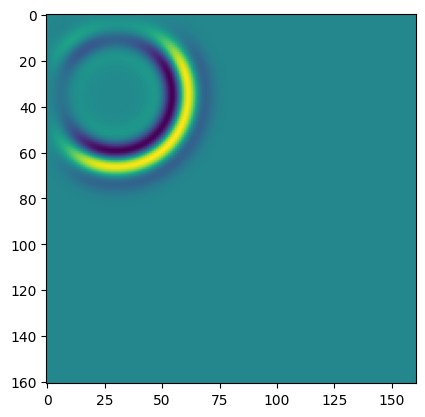

In [13]:
plt.imshow(u2)